In [1]:
'''
Nombre de Grupo: Gustavo Reyes y Christian
'''



'\nNombre de Grupo: Gustavo Reyes y Christian\n'

In [2]:
import pandas as pd
from pycaret.classification import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Taller2_MLE.csv')
df

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,Estándar,12464.23,5,4,1,0,3,2.8,27.93,Bajo,Costa,0
4996,58,Preferente,18939.17,5,3,1,1,0,2.1,34.95,Bajo,Selva,0
4997,30,Estándar,51162.08,3,3,0,1,0,2.3,35.58,Muy Alto,Sierra,0
4998,58,Estándar,14282.38,1,9,0,0,0,2.0,44.67,Medio,Selva,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   5000 non-null   int64  
 1   segmento               5000 non-null   object 
 2   saldo_total            5000 non-null   float64
 3   numero_productos       5000 non-null   int64  
 4   visitas_app_mes        5000 non-null   int64  
 5   usa_web                5000 non-null   int64  
 6   usa_tarjeta_credito    5000 non-null   int64  
 7   reclamos_6m            5000 non-null   int64  
 8   satisfaccion_encuesta  5000 non-null   float64
 9   tasa_credito_personal  5000 non-null   float64
 10  rango_ingresos         5000 non-null   object 
 11  region                 5000 non-null   object 
 12  cerrara_cuenta         5000 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


Conteo de clases:
cerrara_cuenta
0    4298
1     702
Name: count, dtype: int64

Porcentaje de clases:
cerrara_cuenta
0    85.96
1    14.04
Name: proportion, dtype: float64


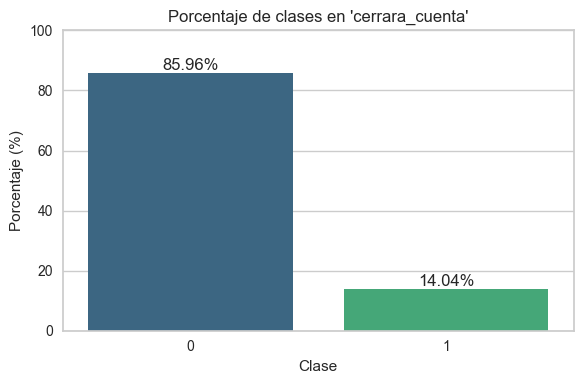

In [6]:

conteo = df['cerrara_cuenta'].value_counts()
porcentaje = df['cerrara_cuenta'].value_counts(normalize=True) * 100

print("Conteo de clases:")
print(conteo)
print("\nPorcentaje de clases:")
print(porcentaje.round(2))

# Graficar
plt.figure(figsize=(6, 4))
sns.barplot(x=porcentaje.index.astype(str), y=porcentaje.values, palette='viridis')
plt.title("Porcentaje de clases en 'cerrara_cuenta'")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Clase")
plt.ylim(0, 100)

# Mostrar etiquetas encima de las barras
for i, p in enumerate(porcentaje.values):
    plt.text(i, p + 1, f'{p:.2f}%', ha='center')

plt.tight_layout()
plt.show()

In [7]:
'''
¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el
dataset?
RPTA: El porcentage de clientes que cerraron su cuenta fue de tan solo 14.04%, un porcentaje ínfimo a comparación de los clientes
      que si mantuvieron su cuenta que representan un 85.96%. Es un caso común por el tipo de negocio. Claramento esto nos indica
      que el dataset se encuentra desbalanceado.
'''

'\n¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el\ndataset?\nRPTA: El porcentage de clientes que cerraron su cuenta fue de tan solo 14.04%, un porcentaje ínfimo a comparación de los clientes\n      que si mantuvieron su cuenta que representan un 85.96%. Es un caso común por el tipo de negocio. Claramento esto nos indica\n      que el dataset se encuentra desbalanceado.\n'

Correlación de variables numéricas con 'cerrara_cuenta':
reclamos_6m              0.024
usa_tarjeta_credito      0.023
visitas_app_mes          0.012
edad                     0.009
usa_web                 -0.005
tasa_credito_personal   -0.020
saldo_total             -0.033
numero_productos        -0.039
satisfaccion_encuesta   -0.140
Name: cerrara_cuenta, dtype: float64


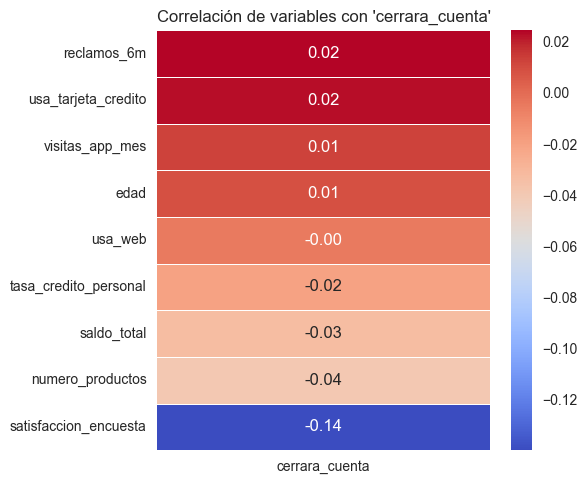

In [15]:
# Seleccionamos solo variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calculamos la correlación de cada variable con la target
correlaciones = variables_numericas.corr()['cerrara_cuenta'].drop('cerrara_cuenta')
correlaciones_ordenadas = correlaciones.sort_values(ascending=False)

# Mostrar correlaciones numéricamente
print("Correlación de variables numéricas con 'cerrara_cuenta':")
print(correlaciones_ordenadas.round(3))

# Visualizar como heatmap vertical
plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones_ordenadas.to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            cbar=True,
            linewidths=0.5)

plt.title("Correlación de variables con 'cerrara_cuenta'")
plt.tight_layout()
plt.show()

In [16]:
'''
¿Qué variables tienen mayor correlación con cerrara_cuenta?
RPTA: La variable independiente que tiene mayor correlacion con la target es "satisfaccion_encuesta". Las personas tienden a 
      cerrar sus cuentas cuando la satifasccion en menor.
'''

'\n¿Qué variables tienen mayor correlación con cerrara_cuenta?\nRPTA: La variable independiente que tiene mayor correlacion con la target es "satisfaccion_encuesta". Las personas tienden a \n      cerrar sus cuentas cuando la satifasccion en menor.\n'

In [24]:
# 4. Configuración PyCaret con enfoque explicativo y ético
clf = setup(data=df,
            target='cerrara_cuenta',
            session_id=2025,
            categorical_features=['segmento','rango_ingresos','region'],
            #ignore_features=['cuota_vs_ingreso'],  # ya se incluye en otra variable
            transformation=True,
            #polynomial_features=True,
            #bin_numeric_features=['edad', 'saldo_total'],
            #feature_interaction=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.85)
            #silent=True)

,Description,Value
0,Session id,2025
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(5000, 20)"
5,Transformed train set shape,"(3500, 20)"
6,Transformed test set shape,"(1500, 20)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [25]:
# 5. Comparación por Recall (prioriza detectar clientes que cerraron su cuenta)
best_model = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4869,0.4731,0.4791,0.1282,0.1762,-0.0204,-0.0233,0.1040
dt,Decision Tree Classifier,0.7469,0.5059,0.1710,0.1497,0.1593,0.0115,0.0115,0.1330
svm,SVM - Linear Kernel,0.7851,0.5762,0.1202,0.2375,0.0674,0.0204,0.0371,0.1220
knn,K Neighbors Classifier,0.8451,0.5208,0.0284,0.1933,0.0485,0.0107,0.0187,0.1240
nb,Naive Bayes,0.8543,0.6161,0.0244,0.2619,0.0442,0.0225,0.0414,0.1170
lightgbm,Light Gradient Boosting Machine,0.8500,0.5951,0.0203,0.2352,0.0365,0.0095,0.0232,0.2910
et,Extra Trees Classifier,0.8557,0.6171,0.0102,0.2033,0.0192,0.0064,0.0158,0.2730
gbc,Gradient Boosting Classifier,0.8571,0.6188,0.0082,0.2500,0.0158,0.0065,0.0217,0.3330
rf,Random Forest Classifier,0.8583,0.6225,0.0020,0.1000,0.0040,0.0001,0.0016,0.3250
lr,Logistic Regression,0.8597,0.6329,0.0000,0.0000,0.0000,0.0000,0.0000,0.3310


In [ ]:
'''
3. ¿Cuál es el mejor modelo en AUC? ¿Y en Recall?
RPTA: El mejor modelo en AUC es "logistic Regression" con un valor de 0.6323; mientras que el
      mejor modelo con Recall es el 'Quadratic Discriminant Analysis'.
'''

In [26]:
df['reclamos_6m'].unique()

array([1, 0, 2, 3, 4, 6, 5], dtype=int64)

In [28]:
clientes_silenciosos = df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] == 0)]
clientes_silenciosos.describe()

,edad,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,cerrara_cuenta
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.0
mean,46.997602,19682.240240,2.755396,6.074341,0.702638,0.635492,0.0,2.646523,34.449424,1.0
std,16.642089,14004.883988,1.403165,2.487805,0.457646,0.481870,0.0,1.134657,8.268616,0.0
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,10.000000,1.0
25%,32.000000,7543.990000,1.000000,4.000000,0.000000,0.000000,0.0,1.800000,29.340000,1.0
50%,47.000000,19344.520000,3.000000,6.000000,1.000000,1.000000,0.0,2.400000,34.890000,1.0
75%,62.000000,29840.220000,4.000000,8.000000,1.000000,1.000000,0.0,3.600000,40.050000,1.0
max,74.000000,63201.240000,5.000000,16.000000,1.000000,1.000000,0.0,5.000000,53.920000,1.0


In [29]:
# Comparar con quienes también se fueron pero SÍ reclamaron
se_fueron_con_reclamo = df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] > 0)]
se_fueron_con_reclamo.describe()

,edad,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,cerrara_cuenta
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.0
mean,45.750877,18756.654877,2.989474,6.192982,0.680702,0.645614,1.308772,2.586316,34.780211,1.0
std,16.463501,13980.202946,1.359588,2.567666,0.467025,0.479168,0.678721,1.167784,8.669050,0.0
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,1.0
25%,32.000000,6109.570000,2.000000,5.000000,0.000000,0.000000,1.000000,1.500000,29.060000,1.0
50%,46.000000,18642.810000,3.000000,6.000000,1.000000,1.000000,1.000000,2.300000,34.340000,1.0
75%,59.000000,29041.970000,4.000000,8.000000,1.000000,1.000000,1.000000,3.600000,40.580000,1.0
max,74.000000,53010.260000,5.000000,17.000000,1.000000,1.000000,6.000000,4.900000,60.700000,1.0


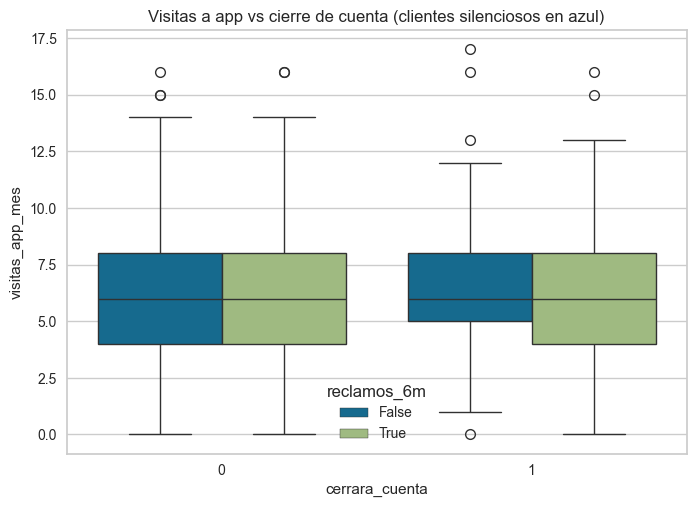

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='cerrara_cuenta', y='visitas_app_mes', hue=(df['reclamos_6m'] == 0))
plt.title("Visitas a app vs cierre de cuenta (clientes silenciosos en azul)")
plt.show()

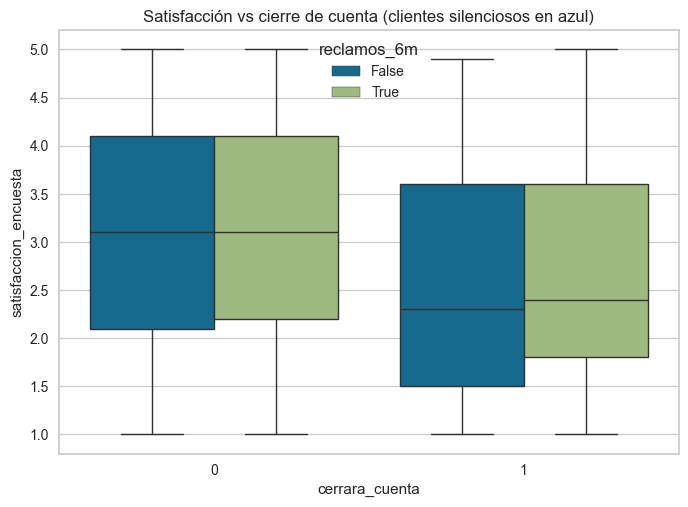

In [31]:
sns.boxplot(data=df, x='cerrara_cuenta', y='satisfaccion_encuesta', hue=(df['reclamos_6m'] == 0))
plt.title("Satisfacción vs cierre de cuenta (clientes silenciosos en azul)")
plt.show()

In [32]:
# Agrupar por categorías para buscar patrones comunes
clientes_silenciosos.groupby(['segmento', 'rango_ingresos', 'region'])\
                    .size().sort_values(ascending=False)

segmento    rango_ingresos  region
Estándar    Medio           Costa     51
            Bajo            Costa     48
            Medio           Sierra    42
            Bajo            Sierra    38
            Medio           Selva     28
            Alto            Costa     26
            Bajo            Selva     19
Preferente  Medio           Costa     19
Estándar    Muy Alto        Costa     18
            Alto            Sierra    12
Preferente  Medio           Sierra    12
            Alto            Costa     11
            Bajo            Costa     11
Estándar    Alto            Selva      7
Preferente  Bajo            Sierra     7
            Medio           Selva      7
Premium     Medio           Costa      6
Estándar    Muy Alto        Sierra     6
                            Selva      6
Preferente  Muy Alto        Costa      6
            Alto            Sierra     6
Premium     Bajo            Costa      6
Preferente  Muy Alto        Sierra     5
            Alto      